<a href="https://colab.research.google.com/github/AvaM1/Math134_Notes/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
# r is the risk-free rate, F is a cash flow, and dT is the time that we get each cash flow
def PV(F, dT, r):
    pv = 0
    if len(dT) != len(F):
        print("Input Error")
        return 0
    for n in range(0, len(F)):
        pv += F[n] * math.exp(-r * dT[n])
    return pv

# C_t is the price of call option, S_t is the current stock price, K is the strike, r is the risk-free rate, dt is time to expiration. D is the dividend of the stock, and dT is the time at which we receive the dividend. The delta is for the continuous dividend paying model. The function will return the price of the corresponding put option.
def put_given_call(C_t, S_t, K, r, dt, D= None, dT = None, delta = 0):
    if D is None: D = []
    if dT is None: dT = []
    return C_t - (S_t - PV(D, dT, r)) * math.exp(-delta * dt) + K * math.exp(-r * dt)

def call_given_put(P_t, S_t, K, r, dt, D = None, dT = None, delta = 0):
    if D is None: D = []
    if dT is None: dT = []
    return P_t + (S_t - PV(D, dT, r)) * math.exp(-delta * dt) - K * math.exp(-r * dt)

def one_step_binomial(r, dt, u, d, Vu, Vd, delta = 0):
    q = (math.exp((r - delta) * dt) - d)/(u-d)
    if not (1 > q > 0):
        print("Arbitrage opportunity exists")
        return -1
    return math.exp(-r * dt)*(q*Vu+(1-q)*Vd)

def Delta(r, dt, u, d, Vu, Vd, S, delta = 0):
    return math.exp(-delta * dt)*(Vu-Vd)/(S*(u-d))

def B(r, dt, u, d, Vu, Vd):
    return math.exp(-r * dt)*(u * Vd - d * Vu)/(u-d)

**11.1**: Consider a one-period binomial model with h = 1, where S = 100, r = 0,
 = 30%, and
 = 0.08.

 Compute American call option prices for K = 70, 80, 90, and 100.

  a. At which strike(s) does early exercise occur?

 b. Use put-call parity to explain why early exercise does not occur at the higher strikes.

 c. Use put-call parity to explain why early exercise is sure to occur for all lower strikes than that in your answer to (a)

In [12]:

import math

dt = 1  # One-year time step
r = 0   # Risk-free rate
delta = 0.08  # Dividend rate
sigma = 0.3  # Volatility
S = 100  # Current stock price
K = [70, 80, 90, 100]  # Array of strike prices

# Function to calculate up factor
def find_u(r, delta, dt, sigma):
    return round(math.exp((r - delta) * dt + sigma * math.sqrt(dt)), 2)

# Function to calculate down factor
def find_d(r, delta, dt, sigma):
    return round(math.exp((r - delta) * dt - sigma * math.sqrt(dt)), 2)

# Function to calculate option price and determine early exercise
def american_one_step(r, dt, u, d, Vu, Vd, K, Option='Call', delta=0):
    q = (math.exp((r - delta) * dt) - d) / (u - d)
    not_early = math.exp(-r * dt) * (q * Vu + (1 - q) * Vd)
    if Option == 'Call':
        early = max(S - K, 0)
    else:
        early = max(K - S, 0)
    if not_early > early:
        decision = "Not early (hold)"
    else:
        decision = "Early"
    return f"K={K}: {max(not_early, early)}, Decision: {decision}"

# Calculate u and d
u = find_u(r, delta, dt, sigma)
d = find_d(r, delta, dt, sigma)

# Calculate and print results for each strike
results = [american_one_step(r, dt, u, d, max(S * u - i, 0), max(S * d - i, 0), i, 'Call', delta) for i in K]
results,

(['K=70: 30, Decision: Early',
  'K=80: 20, Decision: Early',
  'K=90: 14.928196707951317, Decision: Not early (hold)',
  'K=100: 10.662997648536656, Decision: Not early (hold)'],)

(b)
 No, never occur. Since call option exercised early, it only gets dividend, not the interest get from strike. No dividend in this case.


 (c)The value of a put falls when the strike price decreases.Once cross the put lower bound price, all other calls will be exercised.

**11.2**

In [13]:
import math

dt = 1  # One-year time step
r = 0.08   # Risk-free rate
delta = 0.08  # Dividend rate
sigma = 0.3  # Volatility
S = 100  # Current stock price
K = [70, 80, 90, 100]  # Array of strike prices

# Function to calculate up factor
def find_u(r, delta, dt, sigma):
    return round(math.exp((r - delta) * dt + sigma * math.sqrt(dt)), 2)

# Function to calculate down factor
def find_d(r, delta, dt, sigma):
    return round(math.exp((r - delta) * dt - sigma * math.sqrt(dt)), 2)

# Function to calculate option price and determine early exercise
def american_one_step(r, dt, u, d, Vu, Vd, K, Option='Call', delta=0):
    q = (math.exp((r - delta) * dt) - d) / (u - d)
    not_early = math.exp(-r * dt) * (q * Vu + (1 - q) * Vd)
    if Option == 'Call':
        early = max(S - K, 0)
    else:
        early = max(K - S, 0)
    if not_early > early:
        decision = "Not early (hold)"
    else:
        decision = "Early"
    return f"K={K}: {max(not_early, early)}, Decision: {decision}"

# Calculate u and d
u = find_u(r, delta, dt, sigma)
d = find_d(r, delta, dt, sigma)

# Calculate and print results for each strike
results = [american_one_step(r, dt, u, d, max(S * u - i, 0), max(S * d - i, 0), i, 'Call', delta) for i in K]
results



['K=70: 30, Decision: Early',
 'K=80: 21.64026844808015, Decision: Not early (hold)',
 'K=90: 17.705674184792848, Decision: Not early (hold)',
 'K=100: 13.77107992150555, Decision: Not early (hold)']

In [16]:
import numpy as np

S = 120  # Current stock price
K = 100  # Strike price
r = 0.10  # Interest rate
delta = 0.08  # Dividend yield
T_minus_t = 2 / 365  # Time to expiration in years (2 days)


# C >= S * exp(-delta * (T - t)) - K * exp(-r * (T - t))

stock_discount_factor = np.exp(-delta * T_minus_t)
strike_discount_factor = np.exp(-r * T_minus_t)


C_lower_bound = S * stock_discount_factor - K * strike_discount_factor

print(f"The lower bound on the value of the call option is ${C_lower_bound:.2f}")


The lower bound on the value of the call option is $20.00


Early exercise may be optimal when the following condition is met:

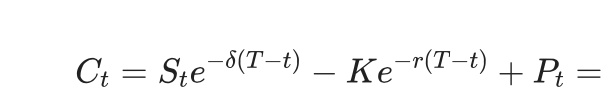

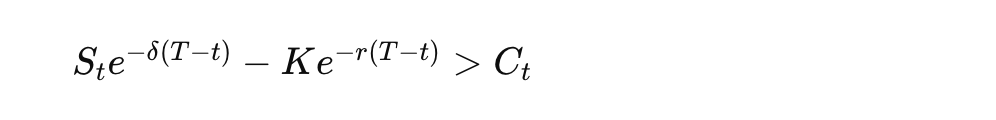

The inequality above indicates that the immediate exercise value exceeds the current option value.

For American options without dividends, early exercise might not be optimal due to the lost time value unless  r=0 and the stock is expected to fall.This could be one interpretation of the put-call parity condition being "satisfied" — indicating that the call option is priced appropriately given the factors in play.

**Exercise 11.3**: Repeat Problem 11.1, only assume that r = 0.08 and $\delta$ = 0. Will early exercise ever occur? Why?

In [11]:
import math

dt = 1  # One-year time step
r = 0.08   # Risk-free rate
delta = 0  # Dividend rate
sigma = 0.3  # Volatility
S = 100  # Current stock price
K = [70, 80, 90, 100]  # Array of strike prices

# Function to calculate up factor
def find_u(r, delta, dt, sigma):
    return round(math.exp((r - delta) * dt + sigma * math.sqrt(dt)), 2)

# Function to calculate down factor
def find_d(r, delta, dt, sigma):
    return round(math.exp((r - delta) * dt - sigma * math.sqrt(dt)), 2)

# Function to calculate option price and determine early exercise
def american_one_step(r, dt, u, d, Vu, Vd, K, Option='Call', delta=0):
    q = (math.exp((r - delta) * dt) - d) / (u - d)
    not_early = math.exp(-r * dt) * (q * Vu + (1 - q) * Vd)
    if Option == 'Call':
        early = max(S - K, 0)
    else:
        early = max(K - S, 0)
    if not_early > early:
        decision = "Not early (hold)"
    else:
        decision = "Early"
    return f"K={K}: {max(not_early, early)}, Decision: {decision}"

# Calculate u and d
u = find_u(r, delta, dt, sigma)
d = find_d(r, delta, dt, sigma)

# Calculate and print results for each strike
results = [american_one_step(r, dt, u, d, max(S * u - i, 0), max(S * d - i, 0), i, 'Call', delta) for i in K]
results,


(['K=70: 35.3818557529355, Decision: Not early (hold)',
  'K=80: 26.150692289069145, Decision: Not early (hold)',
  'K=90: 22.18846618466473, Decision: Not early (hold)',
  'K=100: 18.22624008026031, Decision: Not early (hold)'],)

Not gonna occur, If dividend yied equals to zero. No benefit to early exercise call option as the stock price will not decrease on dividend.

**11.4**
(a)(b)(c)

In [18]:
import math
import numpy as np

S = 100  # Current stock price
r = 0.08  # Annual risk-free rate
sigma = 0.3  # Volatility (annual standard deviation)
h = 1  # Time period
delta = 0  # Dividend yield
K_options = [100, 110, 120, 130]  # Strike prices

u = math.exp(sigma * math.sqrt(h))
d = math.exp(-sigma * math.sqrt(h))

q = (math.exp(r * h) - d) / (u - d)

early_exercise_strikes = []

def american_put_price(S, K, u, d, q, r, h):
    P_u = max(K - S * u, 0)
    P_d = max(K - S * d, 0)

    P_hold = math.exp(-r * h) * (q * P_u + (1 - q) * P_d)


    P_exercise = K - S


    if P_exercise > P_hold:
        early_exercise_strikes.append(K)
        return P_exercise, 'Early exercise'
    else:
        return P_hold, 'Hold'

put_prices = {}
for K in K_options:
    put_price, decision = american_put_price(S, K, u, d, q, r, h)
    put_prices[K] = put_price
    print(f"Strike Price {K}: Put Price = {put_price:.2f}, Decision: {decision}")

# Explanation based on put-call parity
print("\nExplanation using Put-Call Parity:")
for K in K_options:
    if K in early_exercise_strikes:
        print(f"- Early exercise occurs at strike {K} due to the put option's intrinsic value being higher than its time value.")
    else:
        print(f"- Early exercise does not occur at strike {K} because the expected continuation value is higher than the intrinsic value.")

print("\nFor all strikes greater than those for early exercise:")
print("Early exercise is sure to occur since the intrinsic value (K - S) will only increase, making it more favorable compared to the continuation value.")


Strike Price 100: Put Price = 10.47, Decision: Hold
Strike Price 110: Put Price = 14.51, Decision: Hold
Strike Price 120: Put Price = 20.00, Decision: Early exercise
Strike Price 130: Put Price = 30.00, Decision: Early exercise

Explanation using Put-Call Parity:
- Early exercise does not occur at strike 100 because the expected continuation value is higher than the intrinsic value.
- Early exercise does not occur at strike 110 because the expected continuation value is higher than the intrinsic value.
- Early exercise occurs at strike 120 due to the put option's intrinsic value being higher than its time value.
- Early exercise occurs at strike 130 due to the put option's intrinsic value being higher than its time value.

For all strikes greater than those for early exercise:
Early exercise is sure to occur since the intrinsic value (K - S) will only increase, making it more favorable compared to the continuation value.


(b)
 No, never occur. Since call option exercised early, it only gets dividend, not the interest get from strike. No dividend in this case.


 (c)The value of a put falls when the strike price decreases.Once cross the put lower bound price, all other calls will be exercised.

**11.5**

In [23]:
import math

S = 100  # Current stock price
r = 0  # Annual risk-free rate set to 0
sigma = 0.3  # Volatility (annual standard deviation)
h = 1  # Time period
delta = 0.08  # Dividend yield set to 0.08
K_options = [100, 110, 120, 130]  # Strike prices

# Up and down factors
u = math.exp(sigma * math.sqrt(h))
d = math.exp(-sigma * math.sqrt(h))

# Risk-neutral probability with r set to 0
q = (math.exp(-delta * h) - d) / (u - d)

# Determine the lowest strike price at which early exercise will occur
early_exercise_strike = None

# Function to compute put option prices
def american_put_price(S, K, u, d, q, r, h, delta):
    # Put payoff at up and down states
    P_u = max(K - S * u, 0)
    P_d = max(K - S * d, 0)

    # Value of holding the option (no discounting since r = 0)
    P_hold = (q * P_u + (1 - q) * P_d)

    # Immediate exercise value (discounted for dividends)
    P_exercise = max(K - S * math.exp(-delta * h), 0)

    # Early exercise opportunity
    return max(P_hold, P_exercise), P_hold < P_exercise

# Calculate put option prices for each strike price and determine early exercise
put_prices = {}
early_exercise = False
for K in K_options:
    put_price, is_early_exercise = american_put_price(S, K, u, d, q, r, h, delta)
    put_prices[K] = put_price
    if is_early_exercise and early_exercise_strike is None:
        early_exercise_strike = K
        early_exercise = True

# Output the results
print(f"Put Option Prices: {put_prices}")
if early_exercise:
    print(f"The lowest strike price at which early exercise occurs is: {early_exercise_strike}")
else:
    print("No early exercise is optimal for any of the given strike prices.")


Put Option Prices: {100: 18.160344775334547, 110: 25.167143178795293, 120: 32.17394158225604, 130: 39.180739985716784}
No early exercise is optimal for any of the given strike prices.


the put option prices for a binomial model with the given parameters and checks if early exercise is optimal. If it is, the code will identify the lowest strike price at which early exercise occurs. If early exercise never occurs, it will output that no early exercise is optimal for any of the given strike prices.

**11.6**

In [22]:
import math

# Parameters given
S = 100  # Current stock price
r = 0  # Annual risk-free rate set to 0
sigma = 0.3  # Volatility (annual standard deviation)
h = 1  # Time period
delta = 0.08  # Dividend yield set to 0.08
K_options = [100, 110, 120, 130]  # Strike prices

# Up and down factors
u = math.exp(sigma * math.sqrt(h))
d = math.exp(-sigma * math.sqrt(h))

# Risk-neutral probability when r = 0
q = (1 - d) / (u - d)

# Store early exercise information
early_exercise_strikes = []

# Function to compute put option prices and early exercise opportunities
def american_put_price(S, K, u, d, q, r, h, delta):
    # Put payoff at up and down states
    P_u = max(K - S * u, 0)
    P_d = max(K - S * d, 0)

    # Value of holding the option (no discounting since r = 0)
    P_hold = q * P_u + (1 - q) * P_d

    # Immediate exercise value (discounted for dividends)
    P_exercise = max(K - S * math.exp(-delta * h), 0)

    # Determine if early exercise occurs
    if P_exercise > P_hold:
        early_exercise_strikes.append(K)
        return P_exercise, 'Early exercise'
    else:
        return P_hold, 'Hold'

# Calculate and display put option prices for each strike price
put_prices = {}
for K in K_options:
    put_price, decision = american_put_price(S, K, u, d, q, r, h, delta)
    put_prices[K] = put_price
    print(f"Strike Price {K}: Put Price = {put_price:.2f}, Decision: {decision}")

# Determine the lowest strike price at which early exercise occurs, if any
lowest_early_exercise_strike = min(early_exercise_strikes) if early_exercise_strikes else None
print(f"\nThe lowest strike price at which early exercise occurs is: {lowest_early_exercise_strike}")


Strike Price 100: Put Price = 14.89, Decision: Hold
Strike Price 110: Put Price = 20.63, Decision: Hold
Strike Price 120: Put Price = 27.69, Decision: Early exercise
Strike Price 130: Put Price = 37.69, Decision: Early exercise

The lowest strike price at which early exercise occurs is: 120
